## **CreditRiskClassification Model**


### Problem Defination:


In [1]:
# Import Data Manipulation Library
import numpy as np 
import pandas as pd 
# Import Data Visulization Library
import seaborn as sns
import matplotlib.pyplot as plt 
# Import FilterWarnings Library
import warnings 
warnings.filterwarnings('ignore')
#Import Logging 
import logging 
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode= 'w',
                    format= '%(asctime)s - %(levelname)s - %(message)s')
# Import Scikit- Learn Libaries 
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report , confusion_matrix

In [2]:
# Import Dataset using Pandas Function 
payment_data = pd.read_csv('payment_data.csv')
customer_data = pd.read_csv('customer_data.csv')

In [3]:
# Checking Null value in Dataset 
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [5]:
# Merging Two Dataset : Data 
data = payment_data.merge(customer_data,how='left')

In [6]:
data.info

<bound method DataFrame.info of             id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
0     58987402       0       0       0        0           1         10   
1     58995151       0       0       0        0           1          5   
2     58997200       0       0       0        0           2          5   
3     54988608       0       0       0        0           3         10   
4     54987763       0       0       0        0           2         10   
...        ...     ...     ...     ...      ...         ...        ...   
8245  58995478       0       0       0        0           9         15   
8246  54992408       0       0       0        0           1          2   
8247  54988209       0       0       0        0           5         13   
8248  54992408       0       0       0        0           1          2   
8249  54989207       0       0       0        0           1          5   

      prod_limit update_date  new_balance  ...   fea_2 fea_3     fea_4  fea_5  

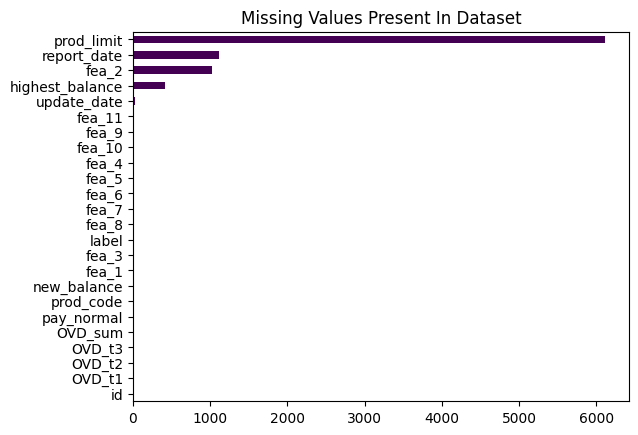

In [7]:
# Checking Null Values Present in dataset
data.isna().sum().sort_values(ascending=True).plot(kind='barh',colormap= 'viridis')
plt.title('Missing Values Present In Dataset')
plt.show()

In [8]:
# Checking Missing Value in percentage for every  column present in dataset 
missing_values = data.isnull().sum()/ len(data) * 100
missing_values.sort_values(ascending=False)

prod_limit         74.157576
report_date        13.503030
fea_2              12.460606
highest_balance     4.957576
update_date         0.315152
id                  0.000000
OVD_t2              0.000000
OVD_t1              0.000000
prod_code           0.000000
pay_normal          0.000000
OVD_sum             0.000000
OVD_t3              0.000000
new_balance         0.000000
label               0.000000
fea_1               0.000000
fea_3               0.000000
fea_4               0.000000
fea_5               0.000000
fea_6               0.000000
fea_7               0.000000
fea_8               0.000000
fea_9               0.000000
fea_10              0.000000
fea_11              0.000000
dtype: float64

### Data Insigts :
1. prod_limit of 74.15%  missing values 
2. report_date,fea_2,highest_balance,update_date these colomns having less than 15% missing values so hence these colomns can be imputed with mean/ median/ mode/ constant techquine 

<function matplotlib.pyplot.show(close=None, block=None)>

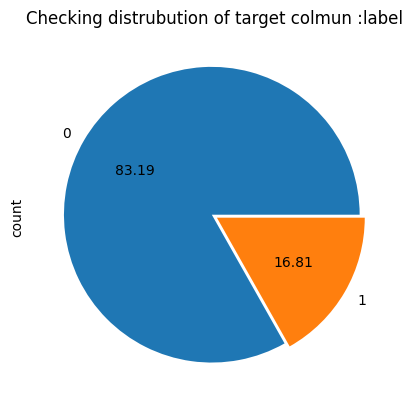

In [9]:
#  Checking the Target Column : Whether the target column is balance is not 
data['label'].value_counts().plot(kind= 'pie', autopct = '%1.2f',explode=[0.02,0.02])
plt.title('Checking distrubution of target colmun :label')
plt.show

In [10]:
 # Areange the data columns
data = data[['id', 'OVD_t1', 'OVD_t2', 'OVD_t3', 'OVD_sum', 'pay_normal', 'prod_code', 'prod_limit', 'update_date', 'new_balance', 'highest_balance', 'report_date', 'label']]

In [11]:
data  = data.drop(columns=['report_date','update_date','prod_limit'],axis= 1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   new_balance      8250 non-null   float64
 8   highest_balance  7841 non-null   float64
 9   label            8250 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 644.7 KB


In [13]:
# Checking Univerate Anlysis 
from collections import OrderedDict

stats = []

for i in data.columns:
    numercial_stats = OrderedDict({

            'Feature':i,
            'Count':data[i].count(),
            'Minumum':data[i].min(),
            'Maximum':data[i].max(),
            'Mean': data[i].mean(),
            'Median': data[i].median(),
            'Q1': data[i].quantile(0.25),
            'Q3': data[i].quantile(0.75),
            'IQR': data[i].quantile(0.75) - data[i].quantile(0.25),
            'Standard Deviation': data[i].std(),
            'Kurtosis': data[i].kurt(),
            'Skewness': data[i].skew()

    })
    stats.append(numercial_stats)
    report = pd.DataFrame(stats)
report


,Feature,Count,Minumum,Maximum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,id,8250,54982353.0,59006239.0,5.782173e+07,58989048.0,54990497.0,58996551.0,4006054.0,1.822724e+06,-1.167606,-0.912485
1,OVD_t1,8250,0.0,34.0,2.490909e-01,0.0,0.0,0.0,0.0,1.250197e+00,203.502050,11.350079
2,OVD_t2,8250,0.0,34.0,1.271515e-01,0.0,0.0,0.0,0.0,8.600464e-01,406.087769,15.318031
3,OVD_t3,8250,0.0,35.0,3.692121e-01,0.0,0.0,0.0,0.0,2.900320e+00,99.087751,9.644601
4,OVD_sum,8250,0.0,31500.0,1.876817e+02,0.0,0.0,0.0,0.0,1.804233e+03,185.918017,13.091835
5,pay_normal,8250,0.0,36.0,1.452667e+01,11.0,4.0,25.0,21.0,1.205363e+01,-1.076180,0.558395
6,prod_code,8250,0.0,27.0,8.232000e+00,10.0,6.0,10.0,4.0,3.533055e+00,2.472783,0.036071
7,new_balance,8250,-40303.2,163211958.0,1.054042e+05,0.0,0.0,24948.0,24948.0,1.887704e+06,6770.874616,79.077382
8,highest_balance,7841,501.0,180000500.0,2.192027e+05,44047.0,23453.0,100500.0,77047.0,2.814536e+06,2599.792903,47.718634
9,label,8250,0.0,1.0,1.681212e-01,0.0,0.0,0.0,0.0,3.739966e-01,1.151613,1.775200


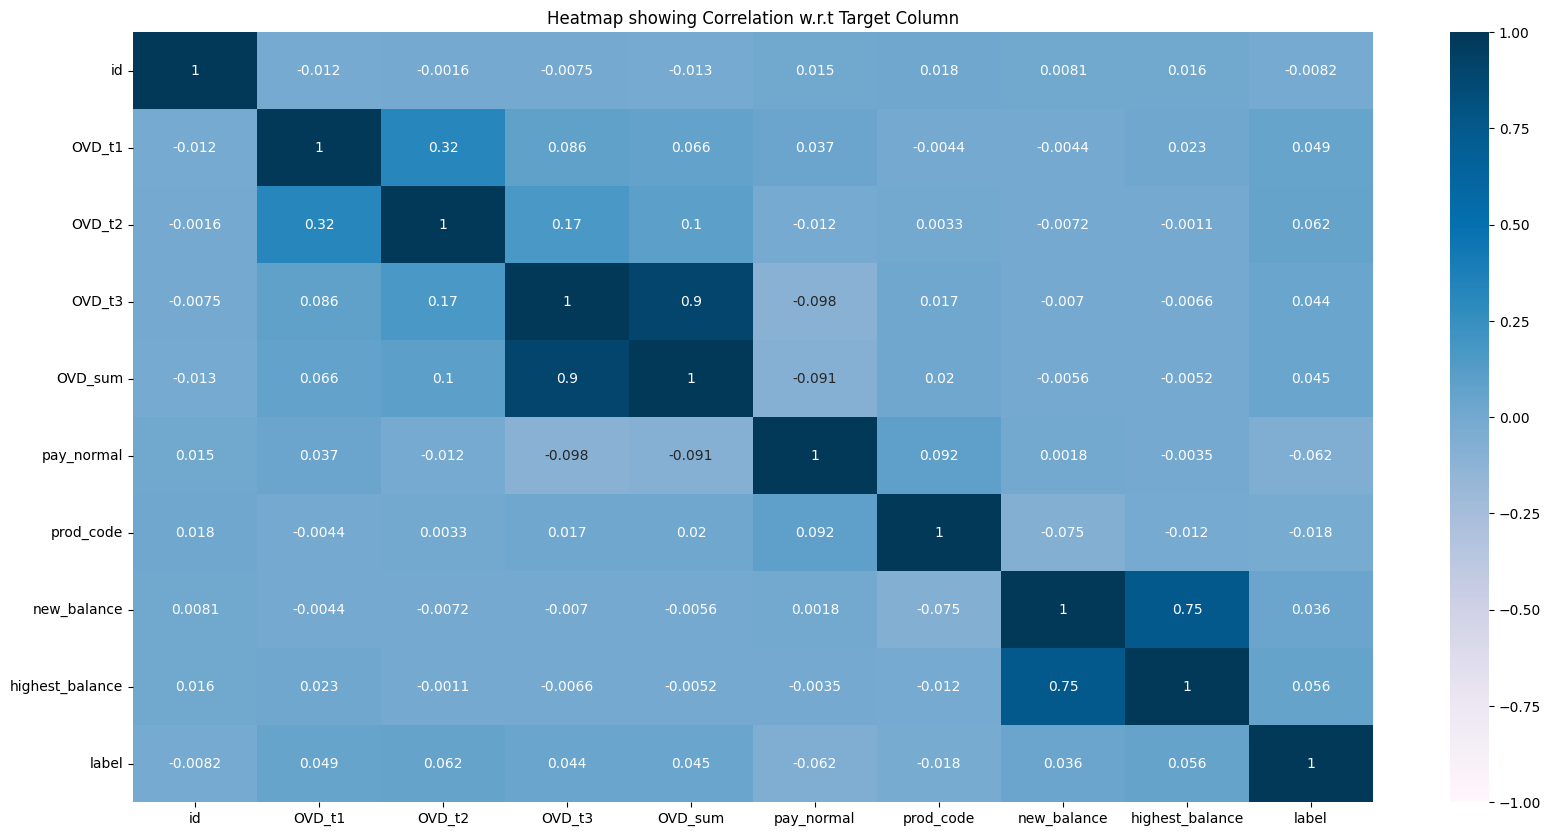

In [14]:
#Checking HeatMap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin = -1,vmax = 1,center = 0 , cmap='PuBu')
plt.title('Heatmap showing Correlation w.r.t Target Column')
plt.show()

In [15]:
# Imputaing Missing Values using Median
data['highest_balance'].fillna(data['highest_balance'].median(), inplace=True)

In [16]:
# Again Checking Null Values in the Dataset
data.isnull().sum()

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
new_balance        0
highest_balance    0
label              0
dtype: int64

In [17]:
# Imputing Missing Values with Median
data['highest_balance'].fillna(data['highest_balance'].median(), inplace=True)

In [18]:
# Step 1: Split the data into features and target variable
X = data.drop(columns=['id', 'label'], axis=1)
y = data['label']

In [19]:
# # Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Step 3 : Using imblearn technique 
from imblearn.over_sampling import SMOTE
sample = SMOTE()
X_train, y_train = sample.fit_resample(X_train, y_train)
print(y_train.value_counts())

label
0    4795
1    4795
Name: count, dtype: int64


In [21]:
# Step 4 : Scaling the Data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.max(), X_test.min())

1.0 0.0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier





models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'KNNClassifier':KNeighborsClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'CatBoostClassifier': CatBoostClassifier(verbose=0),
          'XGBClassifier': XGBClassifier(eval_metric='logloss'),
          'AdaBoostClassifier': AdaBoostClassifier()}

def evaluate(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    # Creating One Dictionary to Save Model Score
    model_score = {}
    for name,model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score


model_score = evaluate(models = models ,X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test)
model_score

{'LogisticRegression': 0.5034343434343435,
 'RandomForestClassifier': 0.711919191919192,
 'KNNClassifier': 0.6533333333333333,
 'DecisionTreeClassifier': 0.6880808080808081,
 'CatBoostClassifier': np.float64(0.7135353535353536),
 'XGBClassifier': 0.7094949494949495,
 'AdaBoostClassifier': 0.6335353535353535}